In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Gradient Descent Implementation with Cost Function Tracking
def gradient_descent_with_cost(x, y, lr, iterations, tolerance=1e-6):
    m = len(y)
    theta0, theta1 = 0, 0  # Initialize parameters
    cost_history = []
    prev_cost = float('inf')

    for i in range(iterations):
        # Predicted values
        y_pred = theta0 + theta1 * x

        # Cost function
        cost = (1 / 2*m) * np.sum((y - y_pred) ** 2)
        cost_history.append(cost)

        # Convergence check
        if abs(prev_cost - cost) < tolerance:
            break
        prev_cost = cost

        # Calculate gradients
        d_theta0 = -(2 / m) * np.sum(y - y_pred)
        d_theta1 = -(2 / m) * np.sum((y - y_pred) * x)

        # Update parameters
        theta0 -= lr * d_theta0
        theta1 -= lr * d_theta1

    return theta0, theta1, cost_history, i + 1

In [5]:
# Normalize the data (to improve stability of gradient descent)
def normalize_data(x):
    mean, std = x.mean(), x.std()
    return (x - mean) / std, mean, std

In [7]:
# Denormalize parameters to original scale
def denormalize_parameters(theta0, theta1, x_mean, x_std, y_mean, y_std):
    theta1_original = theta1 * (y_std / x_std)
    theta0_original = y_mean - theta1_original * x_mean
    return theta0_original, theta1_original

In [9]:
# Load the data
x = np.loadtxt("linearX.csv", delimiter=",")
y = np.loadtxt("linearY.csv", delimiter=",")

In [11]:
# Normalize the data
x_normalized, x_mean, x_std = normalize_data(x)
y_normalized, y_mean, y_std = normalize_data(y)

In [13]:
# Gradient Descent with Learning Rate 0.5
theta0_q1, theta1_q1, cost_history_q1, iterations_q1 = gradient_descent_with_cost(
    x_normalized, y_normalized, lr=0.5, iterations=10000
)
theta0_q1_original, theta1_q1_original = denormalize_parameters(
    theta0_q1, theta1_q1, x_mean, x_std, y_mean, y_std
)

print(f"Final Parameters: theta0 = {theta0_q1_original}, theta1 = {theta1_q1_original}")
print(f"Final Cost: {cost_history_q1[-1]} after {iterations_q1} iterations.")

Final Parameters: theta0 = 0.9903497091968224, theta1 = 0.0007777711241847861
Final Cost: 2854.452986624983 after 3 iterations.


In [15]:
# Debug the gradient descent output
print(f"Theta0: {theta0_q1}, Theta1: {theta1_q1}")
print(f"Cost history length: {len(cost_history_q1)}")
print(f"Last cost value: {cost_history_q1[-1] if cost_history_q1 else 'Empty'}")

Theta0: -5.993545937332812e-14, Theta1: 0.655064426354388
Cost history length: 3
Last cost value: 2854.452986624983


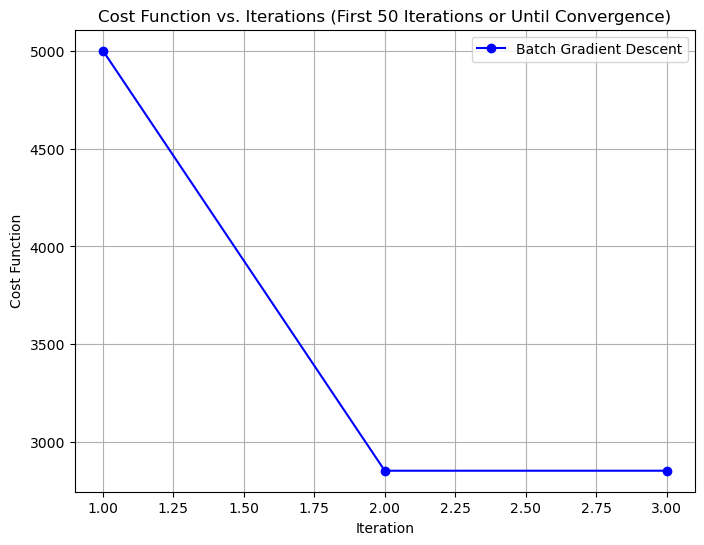

In [17]:
# Question 3: Plot cost function vs iterations (First 50 iterations or fewer if converged)
plt.figure(figsize=(8, 6))

# Dynamically adjust iterations to the length of cost_history_q1
iterations_to_plot = min(50, len(cost_history_q1))
x_values = range(1, iterations_to_plot + 1)
y_values = cost_history_q1[:iterations_to_plot]

# Plot with corrected dimensions
plt.plot(x_values, y_values, marker='o', label="Batch Gradient Descent", color="blue")

plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Cost Function vs. Iterations (First 50 Iterations or Until Convergence)")
plt.grid()
plt.legend()
plt.show()

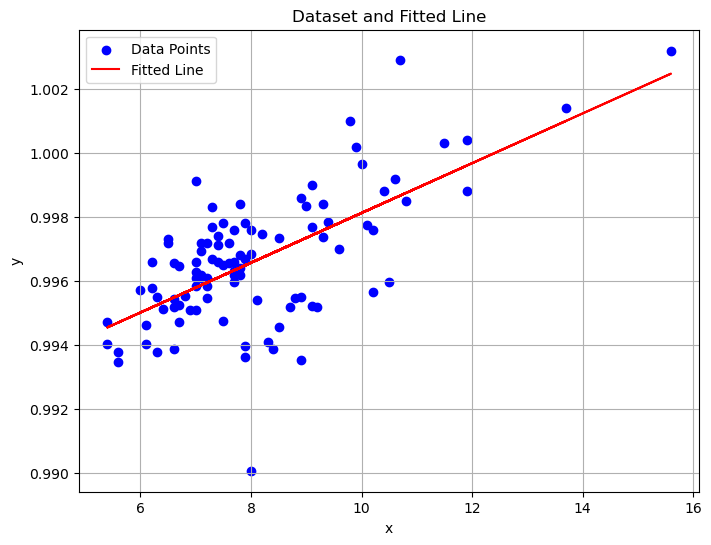

In [19]:
# Plot dataset and fitted line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Data Points", color="blue")
plt.plot(x, theta0_q1_original + theta1_q1_original * x, label="Fitted Line", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset and Fitted Line")
plt.legend()
plt.grid()
plt.show()

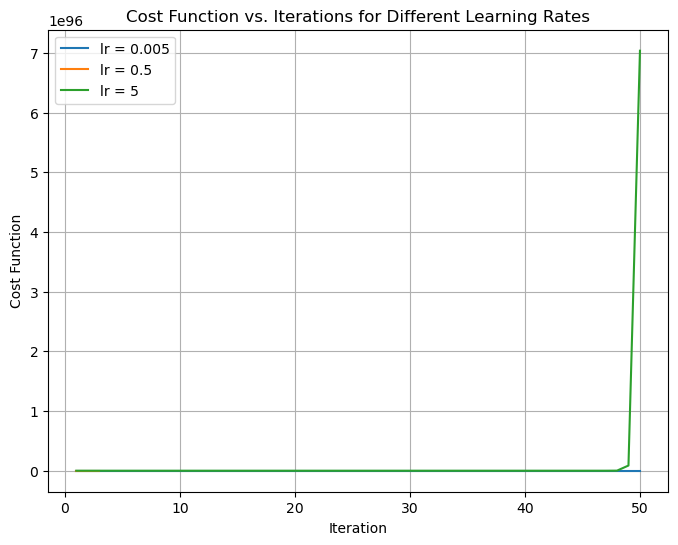

In [21]:
# Effect of Different Learning Rates
learning_rates = [0.005, 0.5, 5]
plt.figure(figsize=(8, 6))

for lr in learning_rates:
    _, _, cost_history_lr, _ = gradient_descent_with_cost(
        x_normalized, y_normalized, lr=lr, iterations=50
    )
    plt.plot(range(1, len(cost_history_lr) + 1), cost_history_lr, label=f"lr = {lr}")

plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.legend()
plt.grid()
plt.show()


In [23]:
# Stochastic and Mini-Batch Gradient Descent
def stochastic_gradient_descent(x, y, lr, iterations):
    m = len(y)
    theta0, theta1 = 0, 0
    cost_history = []

    for _ in range(iterations):
        for i in range(m):
            rand_index = np.random.randint(0, m)
            xi, yi = x[rand_index], y[rand_index]

            y_pred = theta0 + theta1 * xi

            d_theta0 = -2 * (yi - y_pred)
            d_theta1 = -2 * (yi - y_pred) * xi

            theta0 -= lr * d_theta0
            theta1 -= lr * d_theta1

        y_pred = theta0 + theta1 * x
        cost = (1 / m) * np.sum((y - y_pred) ** 2)
        cost_history.append(cost)

    return theta0, theta1, cost_history

def mini_batch_gradient_descent(x, y, lr, iterations, batch_size=10):
    m = len(y)
    theta0, theta1 = 0, 0
    cost_history = []

    for _ in range(iterations):
        indices = np.random.permutation(m)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            x_batch = x_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            y_pred = theta0 + theta1 * x_batch

            d_theta0 = -(2 / len(y_batch)) * np.sum(y_batch - y_pred)
            d_theta1 = -(2 / len(y_batch)) * np.sum((y_batch - y_pred) * x_batch)

            theta0 -= lr * d_theta0
            theta1 -= lr * d_theta1

        y_pred = theta0 + theta1 * x
        cost = (1 / m) * np.sum((y - y_pred) ** 2)
        cost_history.append(cost)

    return theta0, theta1, cost_history

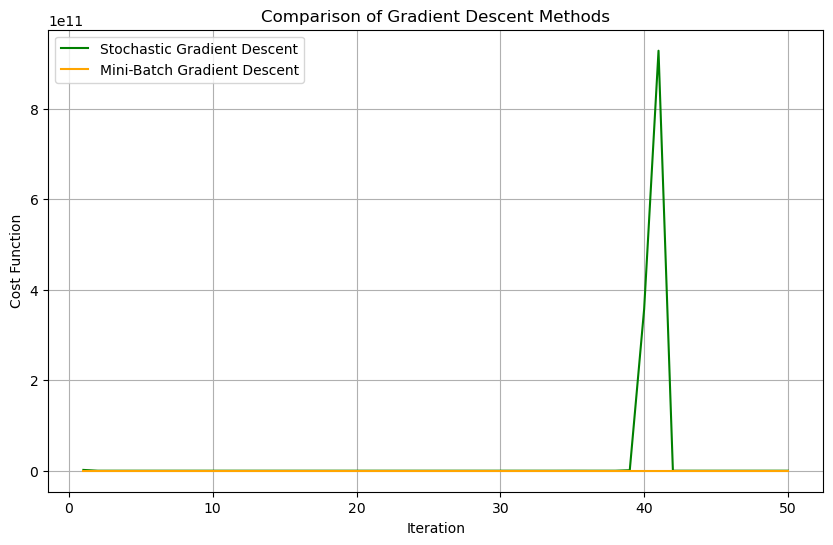

In [25]:
# Run stochastic and mini-batch gradient descent
theta0_sgd, theta1_sgd, cost_history_sgd = stochastic_gradient_descent(
    x_normalized, y_normalized, lr=0.5, iterations=50
)
theta0_mbgd, theta1_mbgd, cost_history_mbgd = mini_batch_gradient_descent(
    x_normalized, y_normalized, lr=0.5, iterations=50, batch_size=10
)
# Plot comparison of cost function
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), cost_history_sgd, label="Stochastic Gradient Descent", color="green")
plt.plot(range(1, 51), cost_history_mbgd, label="Mini-Batch Gradient Descent", color="orange")
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Comparison of Gradient Descent Methods")
plt.legend()
plt.grid()
plt.show()